In [38]:
import numpy as np
import pandas as pd
from statsbombpy import sb
import networkx as nx
import matplotlib.pyplot as plt

from mplsoccer import Pitch, VerticalPitch
import statistics as stats

In [39]:
#Import competition data to find season we are interested in: La Liga - 2020/2021
competition_df = sb.competitions()
season = competition_df[ (competition_df.competition_name == 'La Liga') & (competition_df.season_name == '2020/2021') ]

In [40]:
#Find the matches where Barcelona played. Could be as home team or away team
season_matches = sb.matches(competition_id = season.competition_id.iloc[0],season_id = season.season_id.iloc[0])
barcelona_matches = season_matches[ (season_matches.home_team == 'Barcelona') | ( season_matches.away_team == 'Barcelona') ]
#Note that matches are not in date order
sb.events(barcelona_matches.match_id[0]).columns

Index(['ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_penalty', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_end_location', 'pass_goal_assist', 'pass_hei

In [41]:
#Loop through Barcelona's matches and create DataFrame for all Barcelona's passes in the season
season_barcelona_passes = pd.DataFrame()
#Currently doing just 10 matches as it takes a long time
for match_id_iter in barcelona_matches.match_id[0:1]:
    match_iter = sb.events(match_id=match_id_iter)
    match_iter = match_iter[(match_iter.type == 'Pass') & (match_iter.team == 'Barcelona')]
    season_barcelona_passes = pd.concat([season_barcelona_passes, match_iter[['player','pass_recipient','location','pass_end_location','pass_length','pass_outcome']]], ignore_index=True)
season_barcelona_passes.player.unique()

array(['Lionel Andrés Messi Cuccittini', 'Ousmane Dembélé',
       'Sergio Busquets i Burgos', 'Sergino Dest',
       'Óscar Mingueza García', 'Frenkie de Jong', 'Clément Lenglet',
       'Marc-André ter Stegen', 'Jordi Alba Ramos',
       'Pedro González López', 'Antoine Griezmann',
       'Ronald Federico Araújo da Silva', 'Moriba Kourouma Kourouma',
       'Francisco António Machado Mota de Castro Trincão',
       'Ricard Puig Martí', 'Martin Braithwaite Christensen'],
      dtype=object)

In [54]:
player = 'Lionel Andrés Messi Cuccittini'
player_passes = season_barcelona_passes[season_barcelona_passes.player == player]




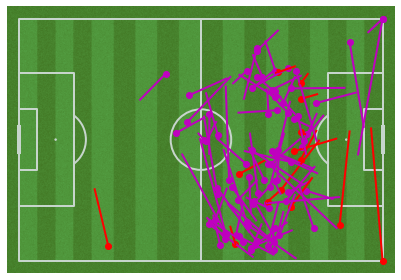

In [55]:
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
            pitch_color='grass', line_color='#c7d5cc', figsize=(13.5, 8),
            constrained_layout=True, stripe=True, tight_layout=False)
fig, ax = pitch.draw()
for i,row in player_passes.iterrows():
    start_loc = row.location
    end_loc = row.pass_end_location
    x_start = start_loc[0]
    y_start = start_loc[1]
    x_end = end_loc[0]
    y_end = end_loc[1]

    
    if row.pass_outcome == 'Incomplete' or row.pass_outcome == 'Unknown':
        pass
        plt.plot((x_start,x_end),(y_start,y_end),color = 'r',linewidth = 2)
        plt.scatter(x_start,y_start,color = 'r')
        
    elif row.pass_outcome == 'Pass Offside':
        plt.plot((x_start,x_end),(y_start,y_end),color = 'y',linewidth = 2)
        plt.scatter(x_start,y_start,color = 'y')

    elif row.pass_outcome == 'Out':
        plt.plot((x_start,x_end),(y_start,y_end),color = 'b',linewidth = 2)
        plt.scatter(x_start,y_start,color = 'b')
    else:
        plt.plot((x_start,x_end),(y_start,y_end),color = 'm',linewidth = 2)
        plt.scatter(x_start,y_start, color = 'm')
    
    


    